In [180]:
from typing import List
from math import sin, cos, radians
import matplotlib.pyplot as plot
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle

In [181]:

class SkidRobot:
    def __init__(self, length, width, x=0, y=0) -> None:
        """Creates a robot

        Args:
            length (_type_): Uses Meters
            width (_type_): Uses Meters
        """
        self.length = length
        self.width = width
        self.x = x
        self.y = y
        self.theta = 0
    
    def move(self, velocity_left, velocity_right, dt=0.1) -> None:
        self.x -= (.5 * (velocity_left + velocity_right)) * sin(radians(self.theta)) * dt
        self.y += (.5 * (velocity_left + velocity_right)) * cos(radians(self.theta)) * dt
        self.theta += (1 / self.width) * (velocity_right - velocity_left) * dt

        
    def get_coords(self) -> "tuple[float, float]":
        return (self.x, self.y)
    
    def move_for_duration(self, duration, velocity_left, velocity_right, dt = 0.1) -> "tuple[list, list]":
        path_x = []
        path_y = []
        
        # put loop in terms of dt = 0.1
        current_time = 0
        while (current_time < duration ):
            path_x.append(self.x)
            path_y.append(self.y)
            self.move(velocity_left, velocity_right, dt)
            current_time += dt

        # Store final point
        path_x.append(self.x)
        path_y.append(self.y)
        return path_x, path_y

    def get_bounds(self) -> "tuple[float, float]":
        return (self.width, self.length)

In [182]:
def plot_path_x_y_angular_velocities(path_x, path_y, angular_momentum) -> None:

    # Graph the path of the robot
    figure, axes = plot.subplots()
    # figure.set_size_inches(9, 9)
    axes.set_title("Path")
    axes.add_patch(Circle((0, 0), 2.5, facecolor="none", ec='k', lw=2))

    for index, path in enumerate(path_x):
        axes.plot(path_x[index], path_y[index], lw=4)

    # Flatten lists
    path_x = [item for sublist in path_x for item in sublist]
    path_y = [item for sublist in path_y for item in sublist]

    # Plot angular momentum by command (each command has constant angular momentum)
    figure, axes = plot.subplots()
    figure.set_size_inches(9, 9)
    axes.plot(angular_momentum)
    axes.set_title("Angular Momentum")
    axes.set_xlabel("Command")

    # Plot x position by time
    figure, axes = plot.subplots()
    figure.set_size_inches(9, 9)
    axes.plot(path_x, label="x")
    axes.set_xlabel("Time step")
    axes.set_title("Position X")

    # Plot y position by time
    figure, axes = plot.subplots()
    figure.set_size_inches(9, 9)
    axes.plot(path_y, label="y")
    axes.set_xlabel("Time step")
    axes.set_title("Position Y")

In [183]:
robot = SkidRobot(.75, .55)
path_x = []
path_y = [] 
angular_momentum = []


# Move 2.4m up, .3 seconds at 8 m/s 

# turn for 4 seconds at 6.1875 +- m/s

v1 = 8.92
v2 = 7.08

# 19 time steps

def get_angular_momentum(duration, velocity_left, velocity_right, robot) -> float:
    delta_theta = duration * ((velocity_right - velocity_left) / robot.width)
    return radians(delta_theta)

duration, velocity_left, velocity_right = .3, 8, 8
sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity_left, velocity_right)
sub_angular_momentum = get_angular_momentum(duration, velocity_left, velocity_right, robot)

path_x.append(sub_path_x)
path_y.append(sub_path_y)
angular_momentum.append(sub_angular_momentum)

duration, velocity_left, velocity_right = 4, 6.1875, -6.1875
sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity_left, velocity_right)
sub_angular_momentum = get_angular_momentum(duration, velocity_left, velocity_right, robot)

print(robot.theta)

path_x.append(sub_path_x)
path_y.append(sub_path_y)
angular_momentum.append(sub_angular_momentum)

duration, velocity_left, velocity_right = 1.9, v1, v2
sub_path_x, sub_path_y = robot.move_for_duration(duration, velocity_left, velocity_right, 0.1)
sub_angular_momentum = get_angular_momentum(duration, velocity_left, velocity_right, robot)

print(robot.theta)

path_x.append(sub_path_x)
path_y.append(sub_path_y)
angular_momentum.append(sub_angular_momentum)



-90.0
-96.35636363636353


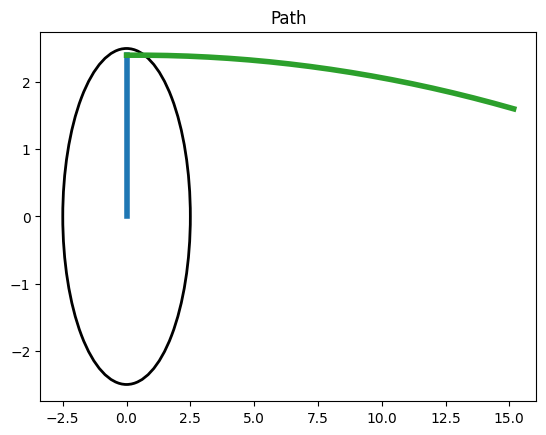

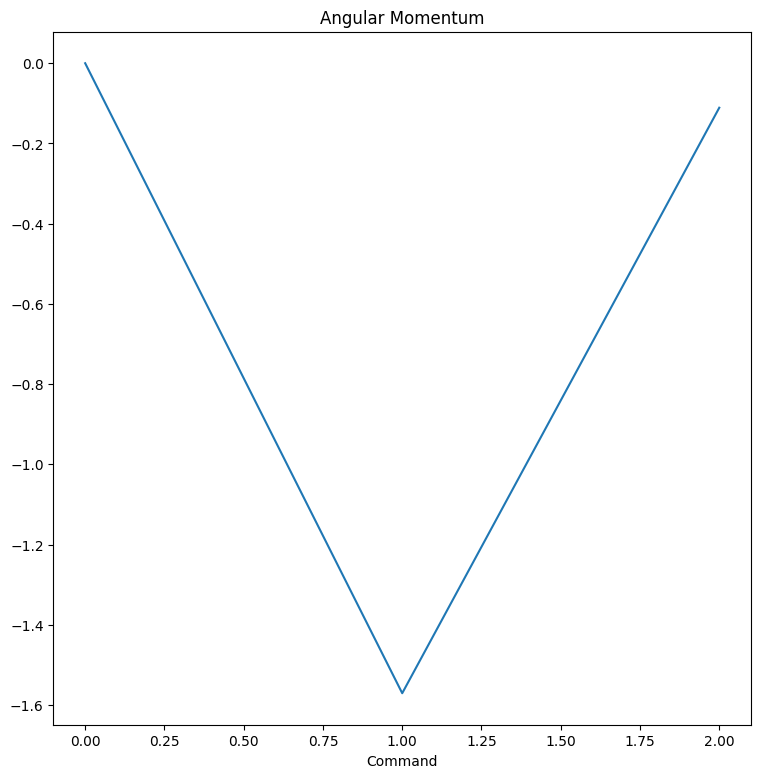

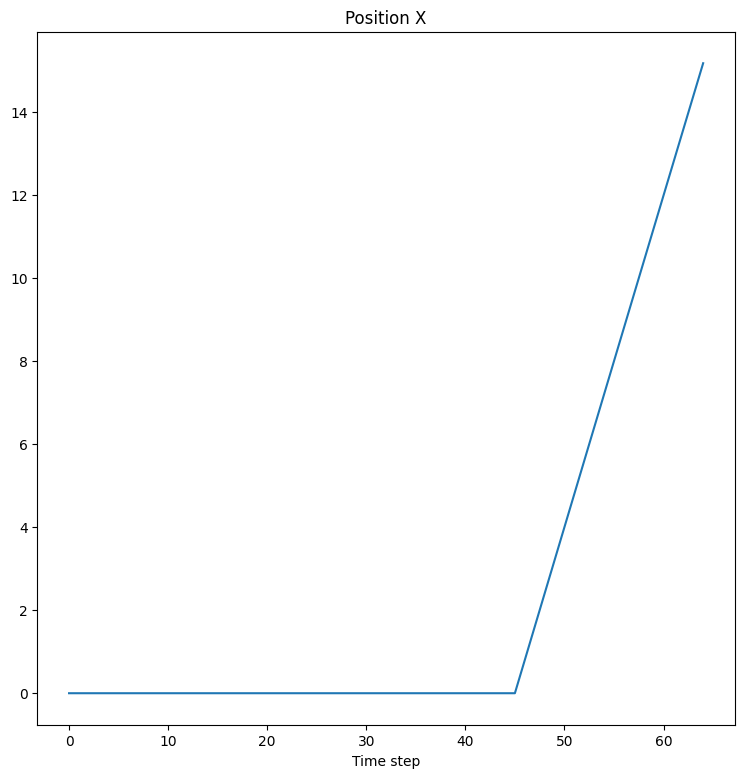

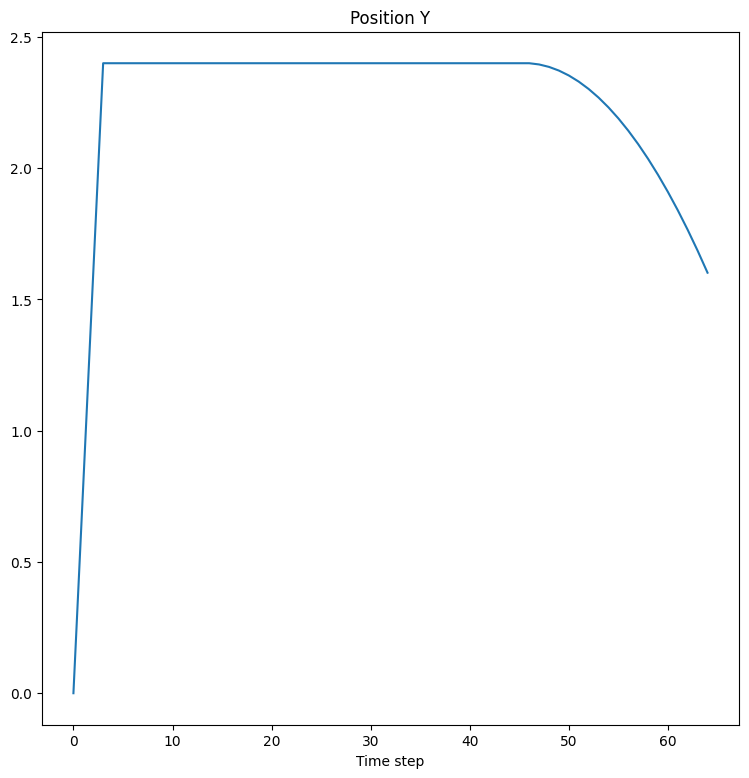

In [184]:
plot_path_x_y_angular_velocities(path_x, path_y, angular_momentum)